In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import seaborn as sns 
import matplotlib.pyplot as plt
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
test=pd.read_csv(r"C:\Users\Kavyasree P\OneDrive\Desktop\Learnings\ZS-Hiring-Challenge-master\Dataset\test_file.csv")
train=pd.read_csv(r"C:\Users\Kavyasree P\OneDrive\Desktop\Learnings\ZS-Hiring-Challenge-master\Dataset\train_file.csv")

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\1449066328.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"C:\Users\Kavyasree P\OneDrive\Desktop\Learnings\ZS-Hiring-Challenge-master\Dataset\train_file.csv")


In [3]:
X=train[['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION']]
Y=train[['LICENSE STATUS']]

In [4]:
test.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION'], dtype='object')

In [5]:
train.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [6]:
train.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [8]:
data=train["LICENSE STATUS"].value_counts()
data

LICENSE STATUS
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

In [9]:
data

LICENSE STATUS
AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='LICENSE STATUS'>

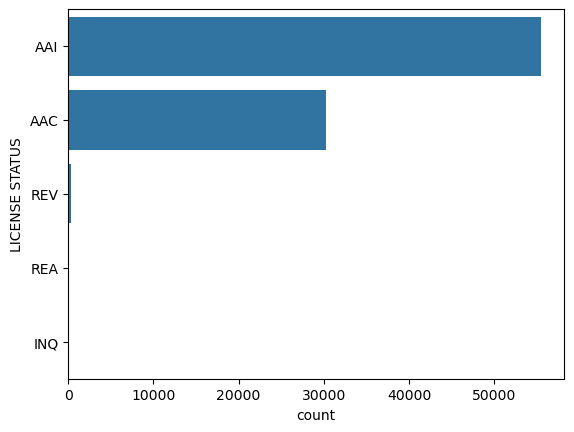

In [10]:
sns.countplot(train["LICENSE STATUS"])

Its an Imbalanced Data Set

Lets check for null values

In [11]:
train.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [12]:
test.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [13]:
train.shape

(85895, 32)

Data Preprocessing

In [14]:
# Dropping columns which will be of no use for our model
col_list = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION']
# Dropping columns which will be of no use for our model
train_data = train.drop(col_list, axis=1)
test_data = test.drop(col_list, axis=1)

In [15]:
# Function to extraxt year and month from datetime data
def conv_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])
date_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
conv_date(date_list)
        

In [16]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [17]:
# Function to impute missing values by mean
def impute_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(train_data[i].mean())
imp_mean_list = ['LATITUDE', 'LONGITUDE']
impute_mean(imp_mean_list)

In [18]:
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('DATE ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [19]:
# Function to impute missing values by rounded value of mean
def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [20]:
imp_mean_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
round_mean(imp_mean_list)

In [21]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [22]:
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 
            'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [23]:
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [24]:
imp_none_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME']
impute_none(imp_none_list)

In [25]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
train_data.head()
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
test_data.head()
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
train_data['LEGAL TYPE'] = 'PVT'
test_data['LEGAL TYPE'] = 'PVT'

### Checking the type of business from the 'LEGAL NAME' and 'DOING BUSINESS AS NAME' columns i.e. Incorporated, LLC, Corporation or Ltd etc.

In [26]:
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['LEGAL TYPE'])
train_data['LEGAL TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['LEGAL TYPE'])
test_data['LEGAL TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['LEGAL TYPE'])

In [27]:
train_data['LEGAL TYPE'].value_counts()


LEGAL TYPE
CORP    27765
PVT     27020
INC     24447
LLC      5048
LTD      1615
Name: count, dtype: int64

In [28]:
col_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME']
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

### Extracting useful information from the column  'LICENSE DESCRIPTION'

In [29]:
train["LICENSE NUMBER"].isnull().sum()

1

In [30]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [31]:
test_data['LICENSE DESCRIPTION'].value_counts()

LICENSE DESCRIPTION
Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Peddler                                                          1208
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Massage Therapist                                                 569
Broker                                                            498


In [32]:
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)
imp_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH', 'WARD PRECINCT', 'LICENSE NUMBER']
impute_nil(imp_nil_list)

## Encoding the values to prepare our model

In [33]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REA', 3)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)

C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\4042115626.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('INQ', 4)


In [34]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [35]:
train_data = create_dummies(train_data)

CITY encoded
STATE encoded
ZIP CODE encoded
Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']
WARD PRECINCT encoded
Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
LEGAL TYPE encoded


C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\3072490657.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][mask] = label_encoder.fit_transform(df[i][mask])
C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\3072490657.

In [36]:
imp_none_list = ['ZIP CODE']
impute_none(imp_none_list)

In [37]:
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))
train_data["LICENSE STATUS"].value_counts()

LICENSE STATUS
0    55400
1    30200
2      290
3        3
4        2
Name: count, dtype: int64

### We will oversample the data of REA, REV since we have very few records of those in the training set. We will also undersample the data of AAC and AAI since we have abundance of their data which may add bias to our model. Hence we will train our model on a very balanced data.

In [38]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train_data = train_data.sample(frac=1)

# Amount of fraud classes in proportion.
fraud_df = train_data[train_data['LICENSE STATUS'] == 4]
pending_df = train_data[train_data['LICENSE STATUS'] == 3]
accepted_df = train_data[train_data['LICENSE STATUS'] == 2]

non_fraud_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
non_accepted_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([fraud_df, pending_df, accepted_df, non_fraud_df, non_accepted_df, fraud_df,
                                  fraud_df, fraud_df, fraud_df, pending_df, pending_df, fraud_df, pending_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,LEGAL TYPE
31195,28388,1,193,16,1609,37.0,29.0,1399,15.0,1006,72,1143130.0,4,0,41.902054,-87.763915,2,2002.0,5.0,2002.0,2002,2002.0,2002.0,1.0,3
15963,259844,1,193,16,1514,42.0,9.0,1720,1.0,1010,41,1335804.0,4,0,41.886832,-87.626556,1,2003.0,11.0,2003.0,2003,2003.0,2003.0,1.0,0
41199,50251,1,193,16,1558,22.0,4.0,698,10.0,1470,80,723.0,4,0,41.844408,-87.720957,2,2008.0,8.0,2008.0,2008,2008.0,2010.0,2.0,1
18775,4643,1,193,16,1591,45.0,48.0,1868,16.0,1470,80,10485.0,4,0,41.958114,-87.752473,2,2011.0,8.0,2011.0,2011,2011.0,2013.0,2.0,1
30115,350965,1,193,16,1534,42.0,31.0,1692,18.0,1475,18,2021157.0,4,0,41.890985,-87.615295,2,2015.0,7.0,2015.0,2015,2015.0,2016.0,2.0,2


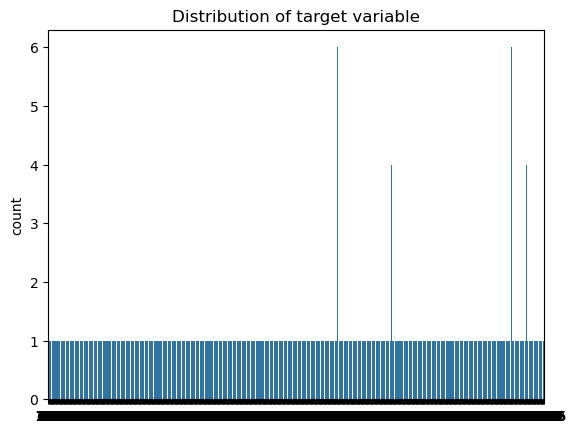

In [39]:
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()
# Since all the years are highly correlated, we will consider the one that has the least missing values
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

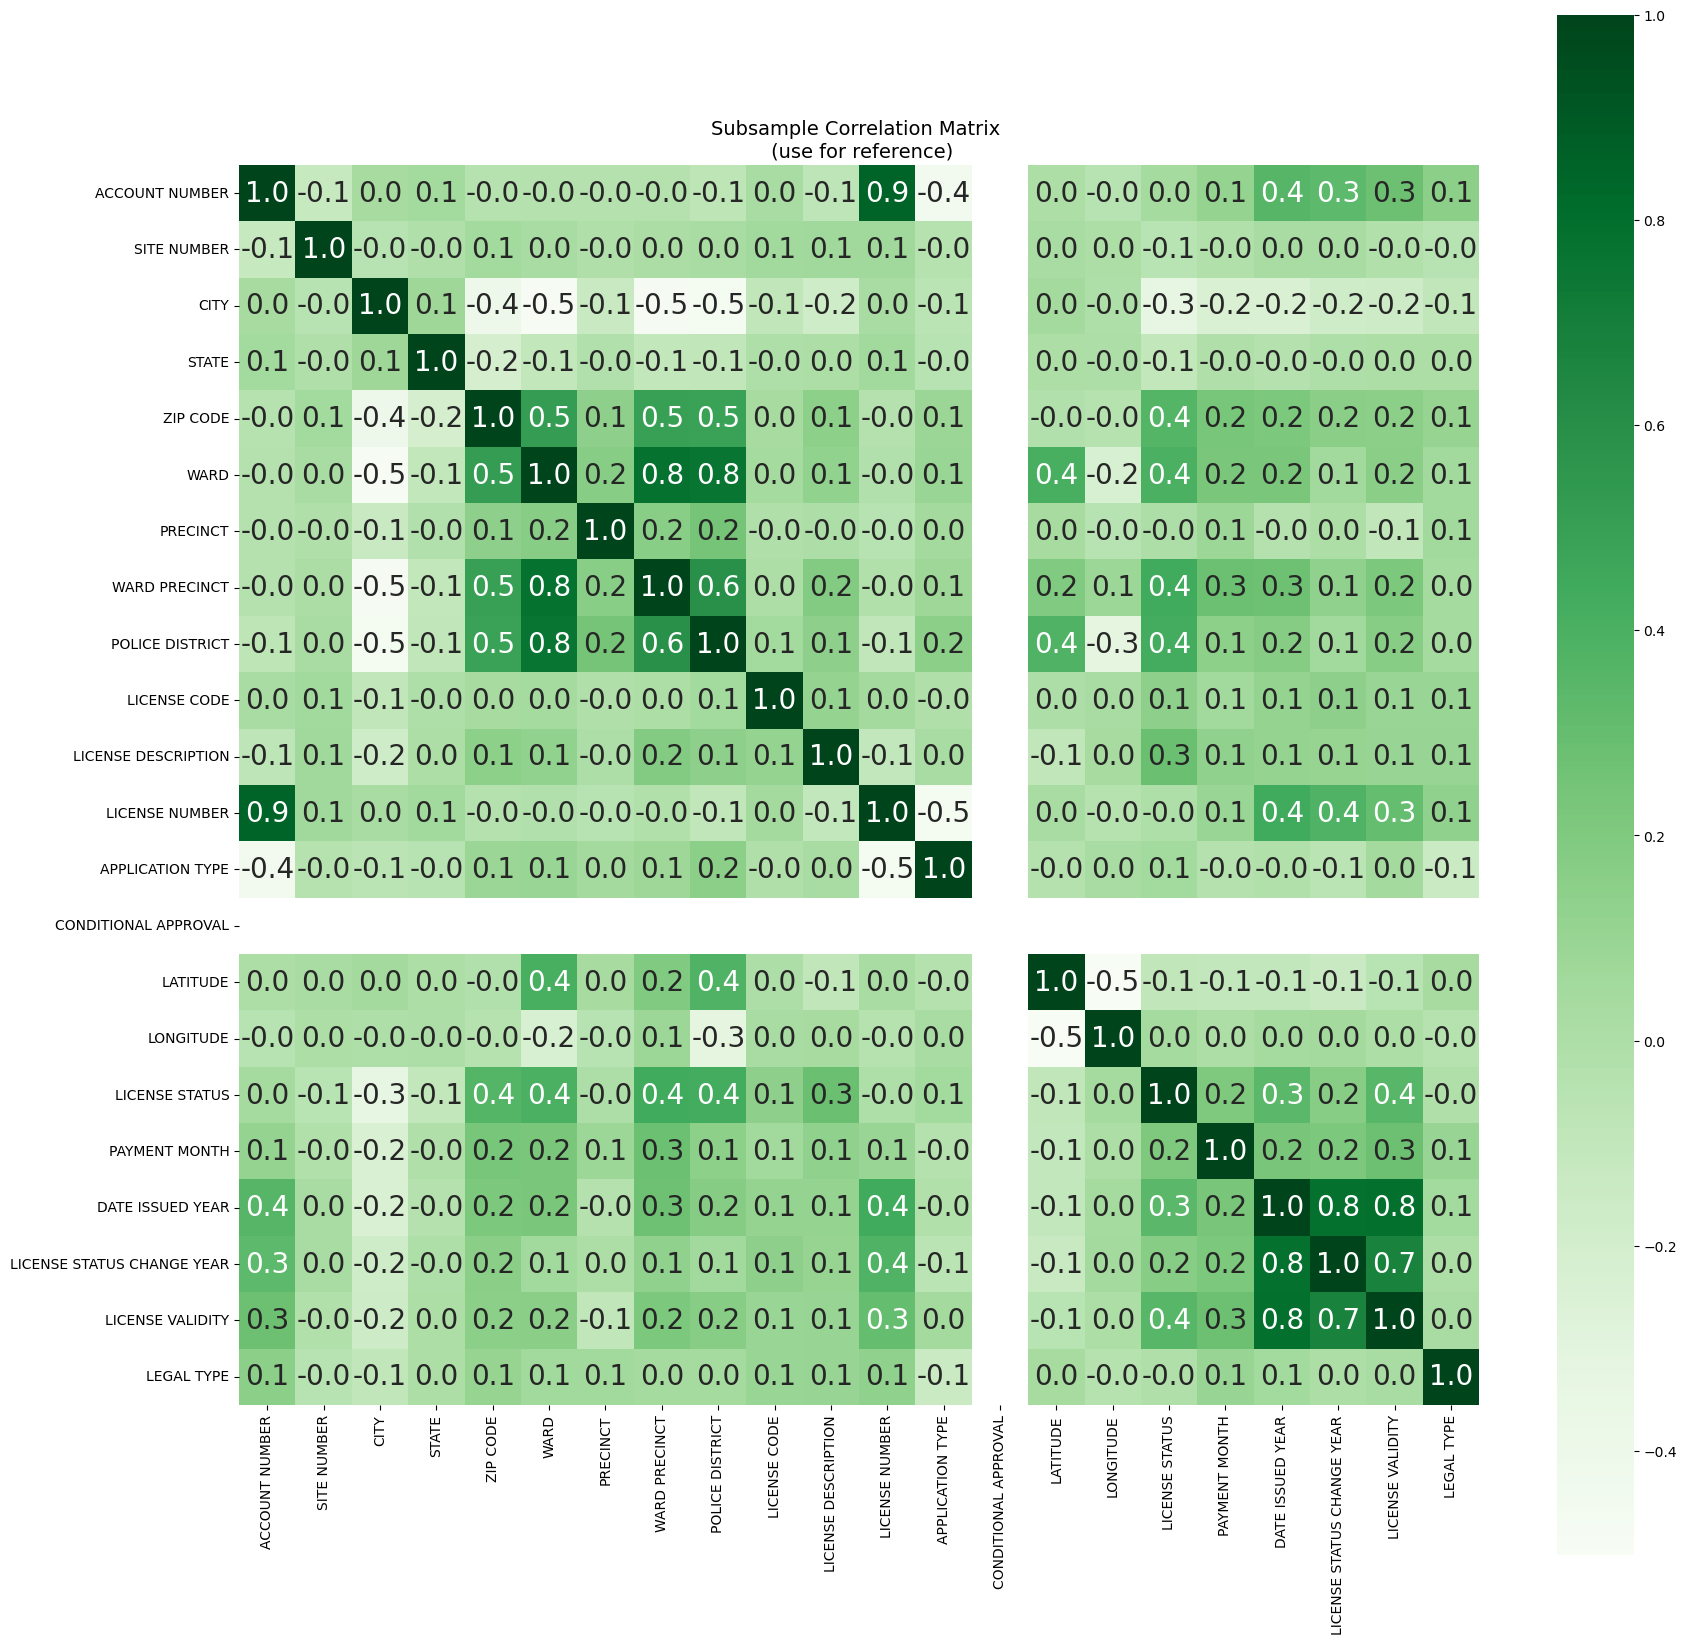

In [40]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [41]:
new_df['LICENSE STATUS'].value_counts()

LICENSE STATUS
0    300
2    290
1    290
4     12
3     12
Name: count, dtype: int64

In [51]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
majority_classes = new_df[new_df['LICENSE STATUS'].isin([0, 2, 1])]
minority_classes = new_df[new_df['LICENSE STATUS'].isin([3, 4])]

# Define the target number of samples for each class
target_count = minority_classes['LICENSE STATUS'].value_counts().max()  # Let's balance to 12 samples

# Undersample the majority classes to the target count (12)
majority_downsampled = majority_classes.groupby('LICENSE STATUS').apply(lambda x: x.sample(target_count)).reset_index(drop=True)

# Oversample the minority classes to the target count (12)
minority_oversampled = minority_classes.groupby('LICENSE STATUS').apply(lambda x: resample(x, replace=True, n_samples=target_count)).reset_index(drop=True)

# Combine undersampled majority class and oversampled minority class
balanced_df = pd.concat([majority_downsampled, minority_oversampled])

# Check the balance
print(balanced_df['LICENSE STATUS'].value_counts())


LICENSE STATUS
0    12
1    12
2    12
3    12
4    12
Name: count, dtype: int64


C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\2601198336.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  majority_downsampled = majority_classes.groupby('LICENSE STATUS').apply(lambda x: x.sample(target_count)).reset_index(drop=True)
C:\Users\Kavyasree P\AppData\Local\Temp\ipykernel_37580\2601198336.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  minority_oversampled = minority_classes.g

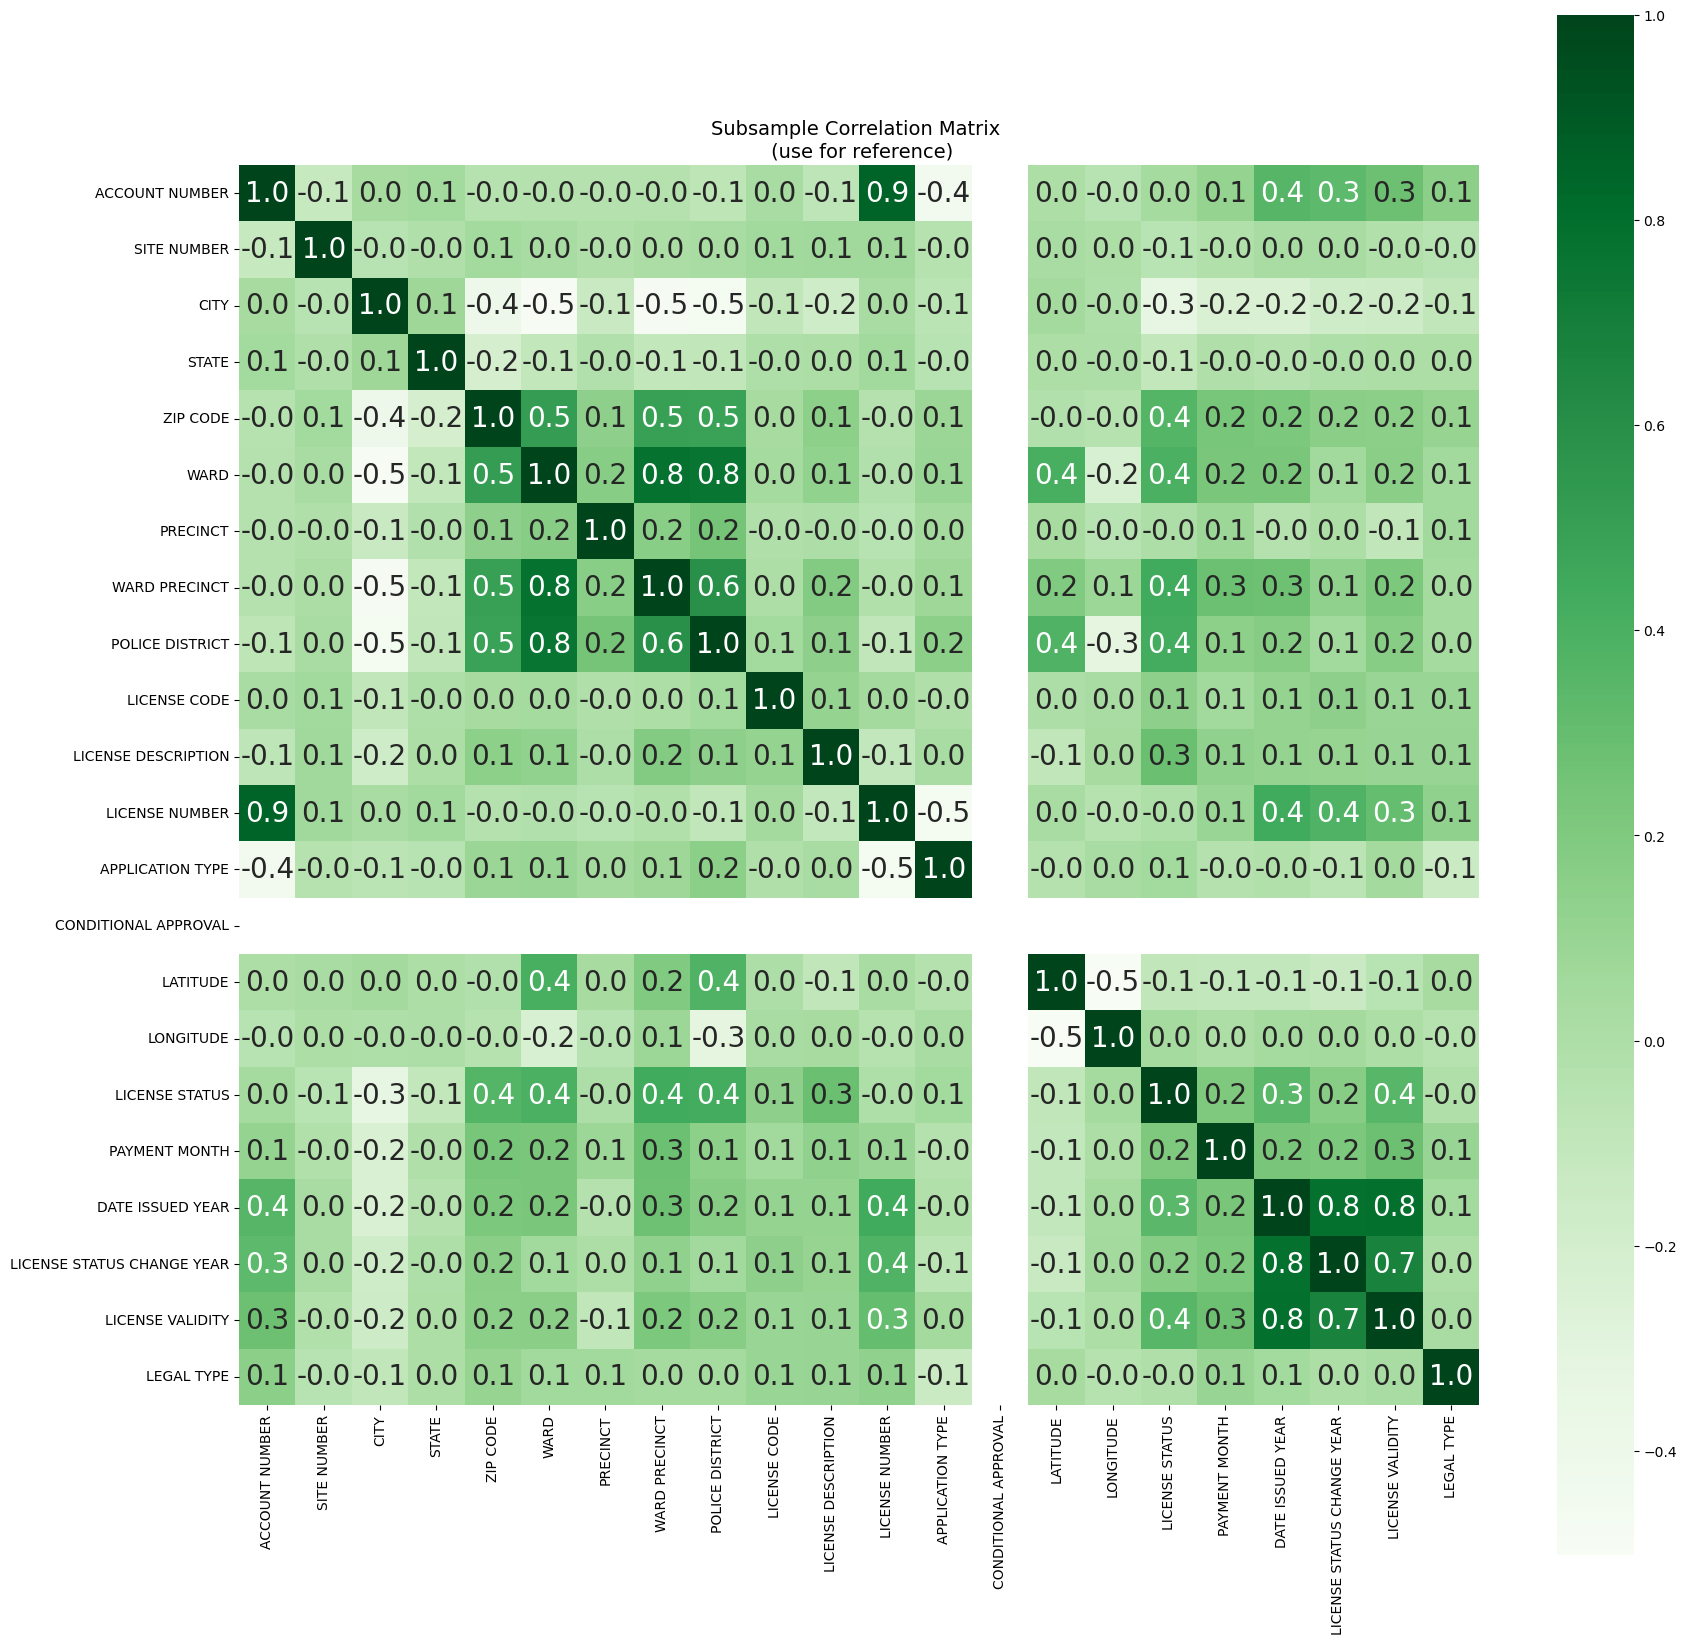

In [52]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [69]:
# Undersampling before cross validating (prone to overfit)
X = balanced_df.drop('LICENSE STATUS', axis=1)
y = balanced_df['LICENSE STATUS']
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [70]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)
# Prediction on test data
y_pred = logreg.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  60.0


c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

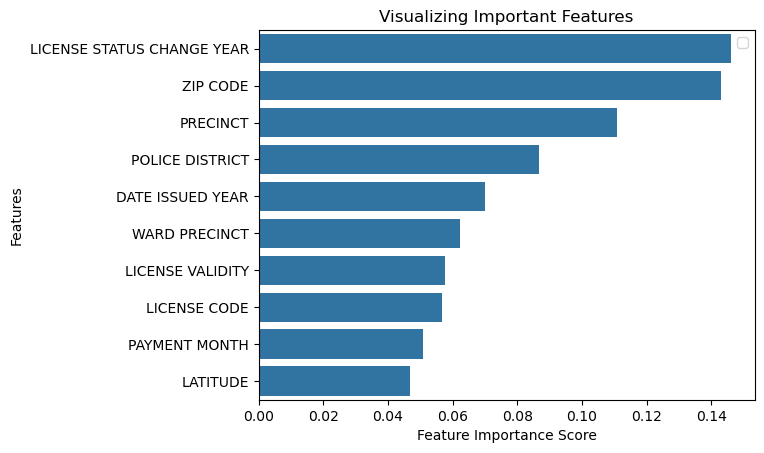

In [72]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [75]:
metrics.accuracy_score(y_test, y_pred)

0.8

In [76]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# A parameter grid for XGBoost for Hyperparameter Optimization
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 6]
        }





In [77]:
grid_obj = GridSearchCV(gbm, parameters)

In [78]:
# Train the model using the training sets
gbm.fit(X_train, y_train)
# Prediction on test data
y_pred = gbm.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )


c:\Users\Kavyasree P\miniconda3\envs\MYENV\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
my_submission = pd.DataFrame({'ID': test["ID"]})

In [80]:
print( 'Total Accuracy : ', acc_xgb )



Total Accuracy :  80.0


In [64]:
## Selecting XGBoost as our best model because of the least underfitting and best F1-score. 
### Hence we can conclude that the most important features are the license status change year and the payment year. We will use the model to submit our predictions on the test dataset.